# Problem 1
- Use the stock returns in DailyReturn.csv for this problem. DailyReturn.csv contains returns for
100 large US stocks and as well as the ETF, SPY which tracks the S&P500.

- Create a routine for calculating an exponentially weighted covariance matrix. If you have a
package that calculates it for you, verify that it calculates the values you expect. This means
you still have to implement it.
Vary . Use PCA and plot the cumulative variance explained by λ ∈ (0, 1) each eigenvalue for
each λchosen.

- What does this tell us about values of λ and the effect it has on the covariance matrix?

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import time
import warnings
from sklearn.decomposition import PCA

In [6]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pypfopt
from pypfopt.expected_returns import returns_from_prices

In [17]:
df_return = pd.read_csv("DailyReturn.csv", index_col = 0)
df_return.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)
df_return.head()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786


In [23]:
pypfopt.risk_models.exp_cov(prices = df_return, returns_data = True, span=180, frequency=252, log_returns=False)

/opt/conda/lib/python3.9/site-packages/pypfopt/risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
SPY,0.020373,0.024570,0.027440,0.022274,0.051702,0.024854,0.024853,0.029479,0.057691,0.007548,...,0.017770,0.006539,-0.003216,0.025162,0.002572,0.005791,0.022337,0.031039,0.021503,0.021554
AAPL,0.024570,0.066008,0.043272,0.041681,0.091615,0.033026,0.033317,0.032624,0.085782,-0.000827,...,0.009807,-0.003003,-0.015696,0.037735,0.000981,-0.000158,0.019604,0.025988,0.010563,0.020062
MSFT,0.027440,0.043272,0.066792,0.034274,0.085509,0.050327,0.049836,0.040128,0.092910,-0.001184,...,0.002567,0.000503,-0.011074,0.033325,-0.004093,0.001227,0.021703,0.020119,0.007613,0.017500
AMZN,0.022274,0.041681,0.034274,0.062389,0.055090,0.037305,0.037348,0.038808,0.099146,-0.001681,...,0.005742,0.001314,-0.011483,0.034278,0.000696,-0.003719,0.017542,0.007390,0.010404,0.026766
TSLA,0.051702,0.091615,0.085509,0.055090,0.504212,0.053653,0.055312,0.070356,0.198592,-0.006857,...,0.034615,-0.022301,-0.031457,0.075074,0.009928,0.008665,0.039214,0.081637,0.045754,0.034059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMT,0.005791,-0.000158,0.001227,-0.003719,0.008665,0.000271,0.002522,0.030942,-0.025298,0.010056,...,0.011437,0.004187,0.009025,0.004030,0.001036,0.062769,0.012697,0.023500,0.015461,0.010137
SYK,0.022337,0.019604,0.021703,0.017542,0.039214,0.024856,0.024765,0.030298,0.033280,0.012490,...,0.027113,0.006744,0.004652,0.029017,0.003182,0.012697,0.065970,0.049219,0.030941,0.033057
GM,0.031039,0.025988,0.020119,0.007390,0.081637,0.024518,0.025323,0.028094,0.069662,0.030059,...,0.064520,0.012290,0.014107,0.037815,0.002924,0.023500,0.049219,0.185044,0.062904,0.049305
TFC,0.021503,0.010563,0.007613,0.010404,0.045754,0.013568,0.013426,0.026622,0.034942,0.031496,...,0.066336,0.014949,0.011783,0.019971,0.005186,0.015461,0.030941,0.062904,0.076579,0.022947


In [28]:
# Basically, just add Lambda
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
# https://pyportfolioopt.readthedocs.io/en/latest/_modules/pypfopt/risk_models.html#exp_cov

def _pair_exp_cov(X, Y, Lambda, span=180):
    """
    Calculate the exponential covariance between two timeseries of returns.

    :param X: first time series of returns
    :type X: pd.Series
    :param Y: second time series of returns
    :type Y: pd.Series
    :param span: the span of the exponential weighting function, defaults to 180
    :type span: int, optional
    :return: the exponential covariance between X and Y
    :rtype: float
    """
    covariation = (X - X.mean()) * (Y - Y.mean())
    # Exponentially weight the covariation and take the mean
    if span < 10:
        warnings.warn("it is recommended to use a higher span, e.g 30 days")
    # return covariation.ewm(span = span).mean().iloc[-1]
    return covariation.ewm(alpha = 1 - Lambda).mean().iloc[-1]


def exp_cov(
    prices, returns_data=False, Lambda = 0.97, span=180, frequency=252, log_returns=False, **kwargs
):
    """
    Estimate the exponentially-weighted covariance matrix, which gives
    greater weight to more recent data.

    :param prices: adjusted closing prices of the asset, each row is a date
                   and each column is a ticker/id.
    :type prices: pd.DataFrame
    :param returns_data: if true, the first argument is returns instead of prices.
    :type returns_data: bool, defaults to False.
    :param span: the span of the exponential weighting function, defaults to 180
    :type span: int, optional
    :param frequency: number of time periods in a year, defaults to 252 (the number
                      of trading days in a year)
    :type frequency: int, optional
    :param log_returns: whether to compute using log returns
    :type log_returns: bool, defaults to False
    :return: annualised estimate of exponential covariance matrix
    :rtype: pd.DataFrame
    """
    if not isinstance(prices, pd.DataFrame):
        warnings.warn("data is not in a dataframe", RuntimeWarning)
        prices = pd.DataFrame(prices)
    assets = prices.columns
    if returns_data:
        returns = prices
    else:
        returns = returns_from_prices(prices, log_returns)
    N = len(assets)

    # Loop over matrix, filling entries with the pairwise exp cov
    S = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            S[i, j] = S[j, i] = _pair_exp_cov(
                returns.iloc[:, i], returns.iloc[:, j], Lambda, span
            )
    cov = pd.DataFrame(S * frequency, columns=assets, index=assets)

    # return fix_nonpositive_semidefinite(cov, kwargs.get("fix_method", "spectral"))
    return cov

Text(0, 0.5, 'explained_variance_ratio')

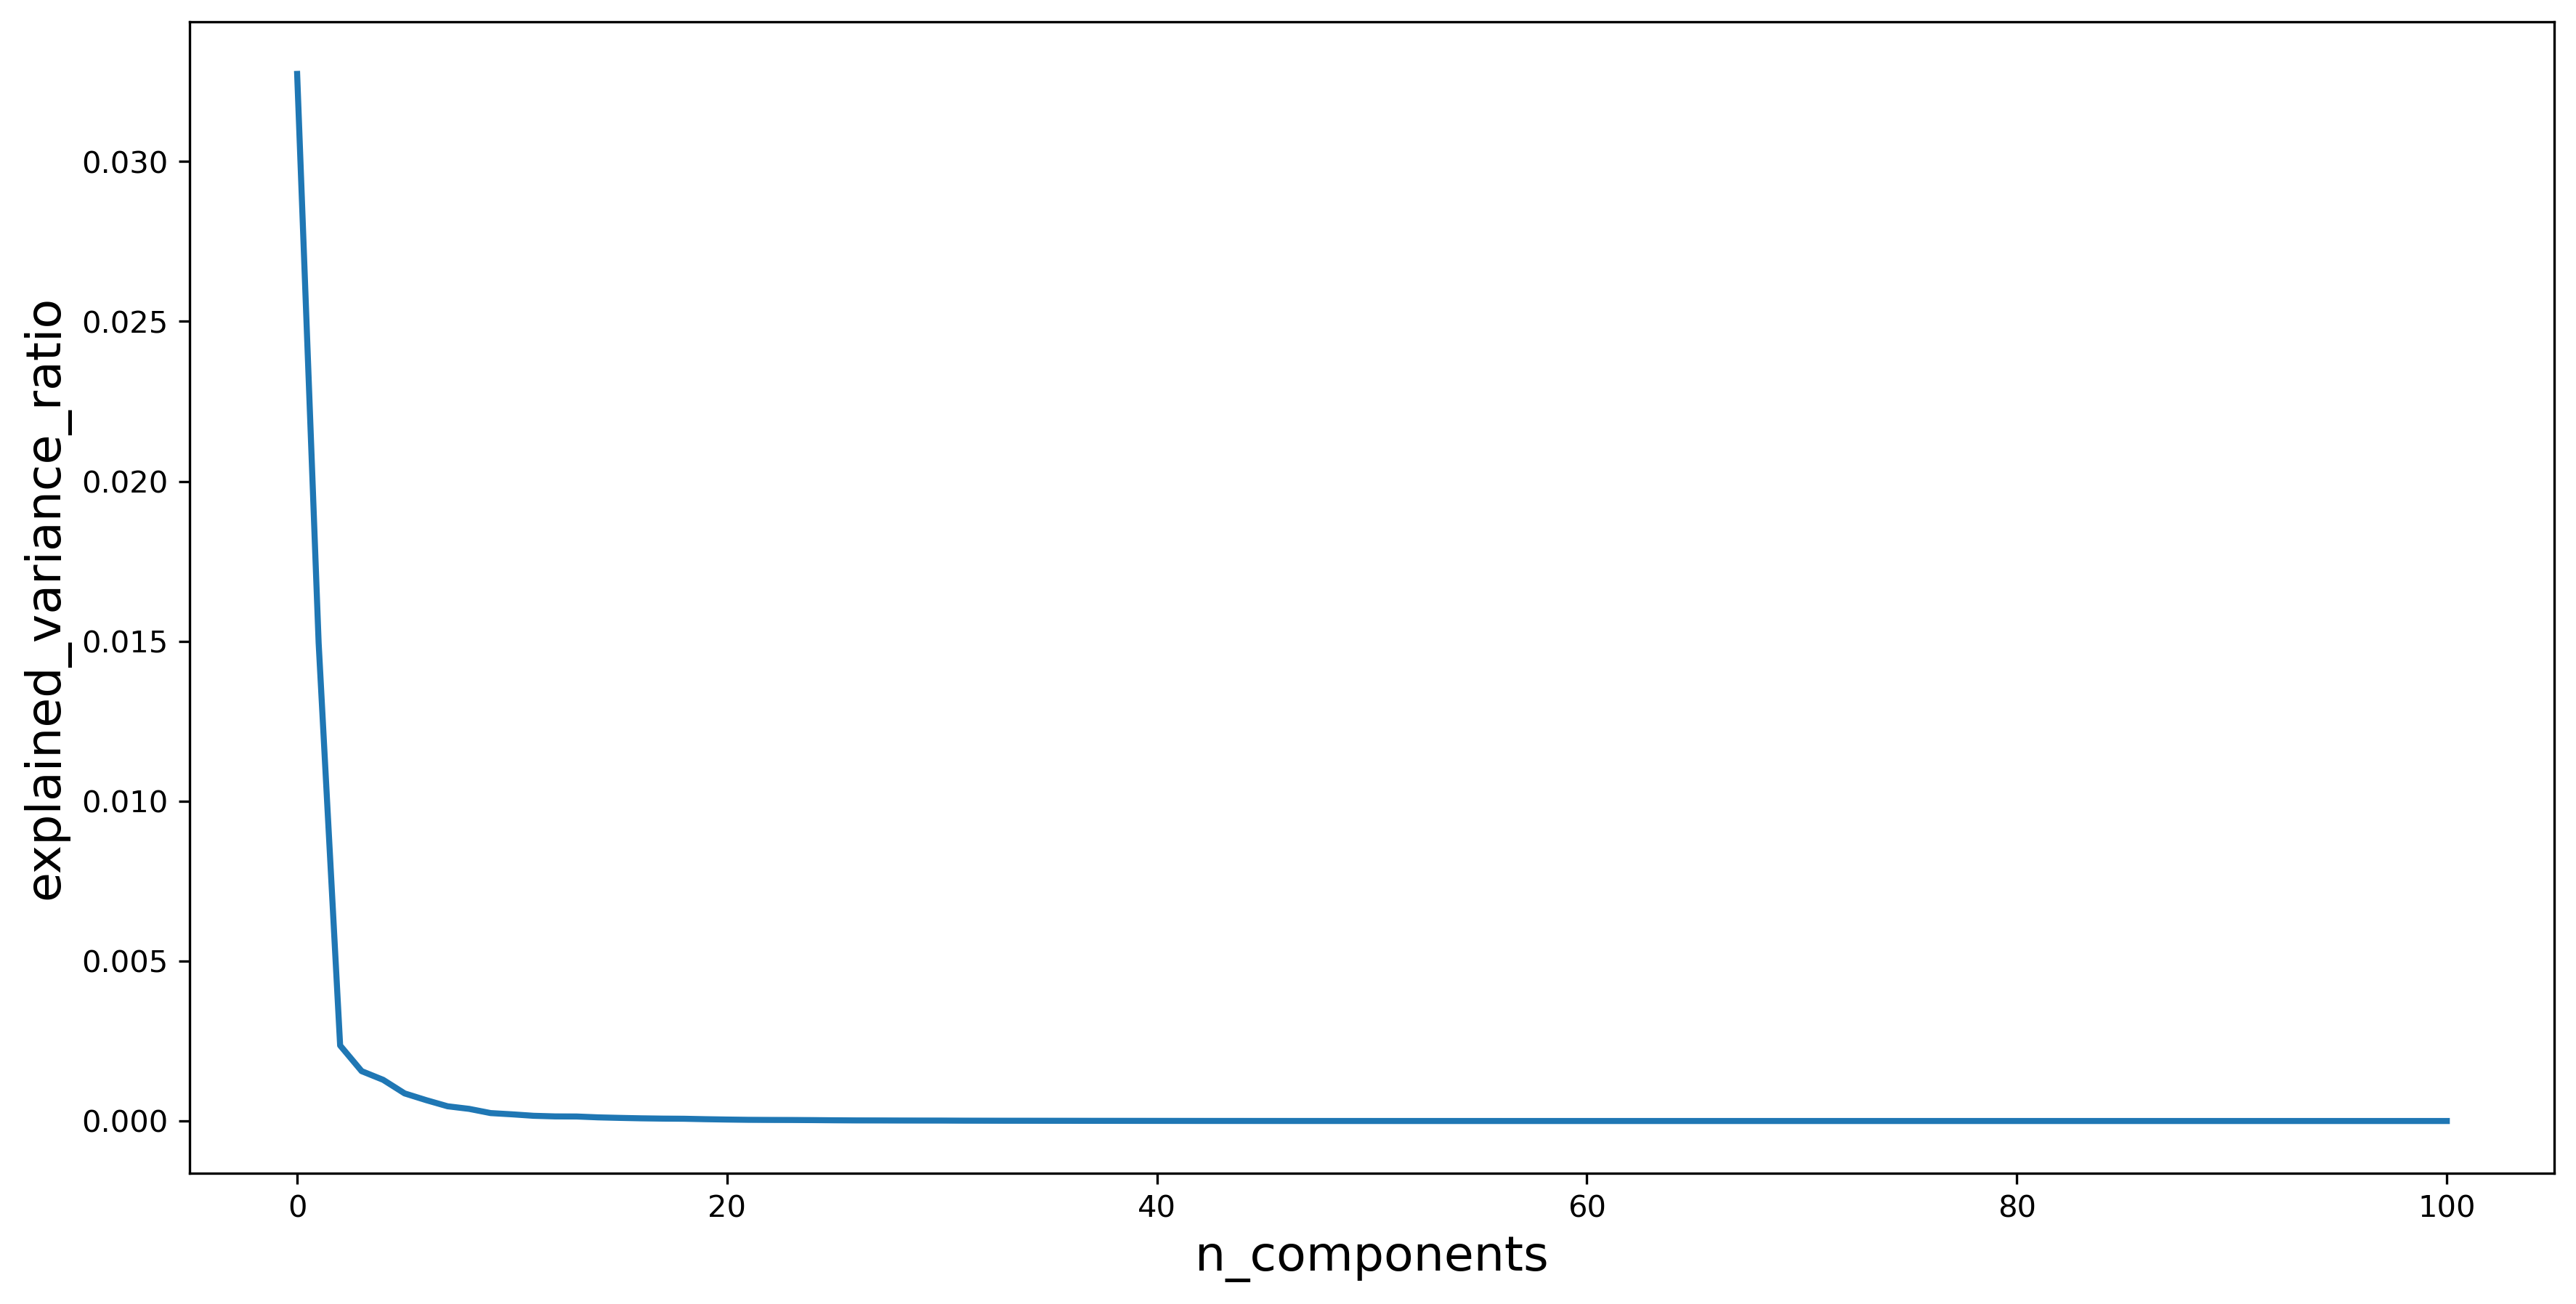

In [61]:
df_exp_cov = exp_cov(prices = df_return, returns_data = True, Lambda = 0.97, span=180, frequency=252, log_returns=False)
pca = PCA()
pca.fit(df_exp_cov)
plt.figure(figsize = (14, 7), dpi = 300)
plt.plot(pca.explained_variance_, linewidth = 2)
plt.xlabel('n_components', fontsize = 16)
plt.ylabel('explained_variance_ratio', fontsize = 16)

[5.52916881e-01 8.28032380e-03 3.95535113e-06 1.25976560e-07
 1.66192045e-09 2.22855426e-11 2.72452433e-13 3.56536485e-15
 6.22769446e-17 7.49620264e-19 3.14957536e-23 8.80976328e-25
 9.46118437e-27 5.91896848e-29 1.93188503e-30 1.49347145e-32
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.50320833e-33 4.50320833e-33 4.50320833e-33
 4.50320833e-33 4.503208

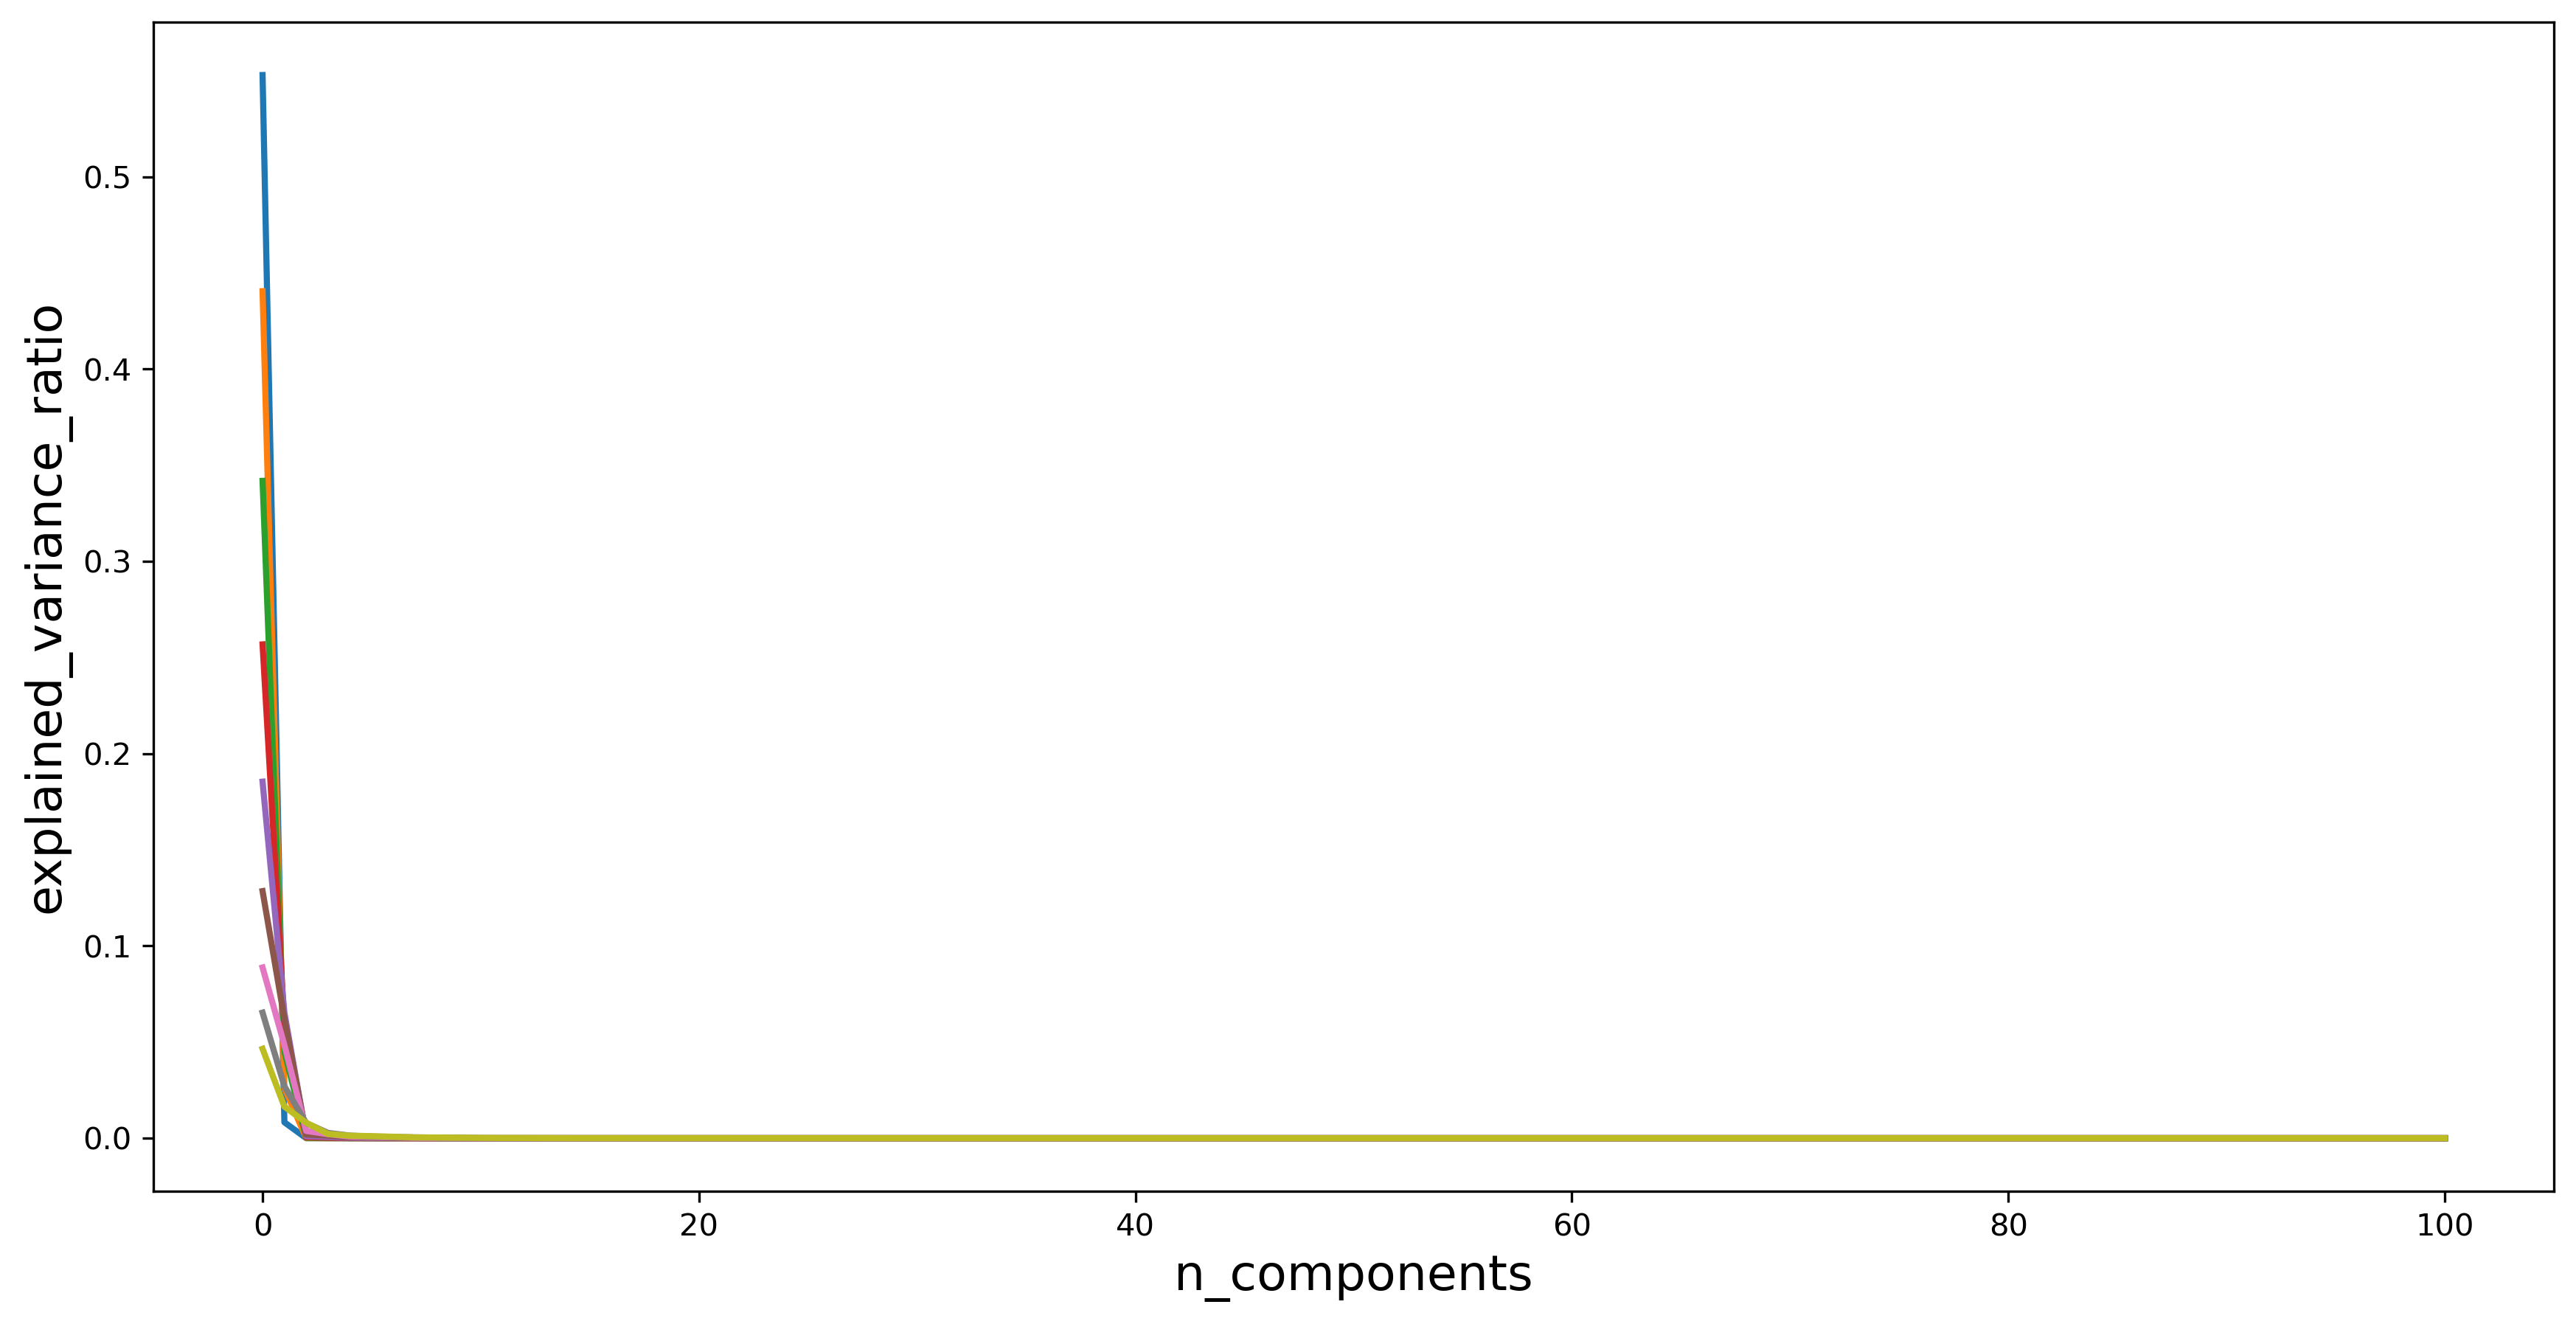

In [65]:
plt.figure(figsize = (14, 7), dpi = 300)
for i in range(10, 100, 10):
    df_exp_cov = exp_cov(prices = df_return, returns_data = True, Lambda = i/100, span=180, frequency=252, log_returns=False)
    pca = PCA()
    pca.fit(df_exp_cov)
    print(pca.explained_variance_)
    plt.plot(pca.explained_variance_, linewidth = 2)
    plt.xlabel('n_components', fontsize = 16)
    plt.ylabel('explained_variance_ratio', fontsize = 16)